In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#!pip install tensorflow
print(tf.__version__)

2.15.0


In [4]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input,
                                   validation_split = 0.2,
                                  rotation_range = 45,
                                  shear_range = 0.2,
                                  horizontal_flip = True)
train_generator = train_datagen.flow_from_directory(
        directory = './data',
        target_size=(224, 224),
        batch_size=64,
        classes=['cardboard', 'glass','metal','paper','plastic','trash'],
        class_mode='categorical',
        subset = 'training',
        )
val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input,validation_split = 0.2)
val_generator = val_datagen.flow_from_directory(
        directory = './data',
        target_size=(224, 224),
        batch_size=64,
        classes=['cardboard', 'glass','metal','paper','plastic','trash'],
        class_mode='categorical',
        subset = 'validation',
        )

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [5]:
base_model = tf.keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False,
)

In [6]:
base_model.trainable = False

In [7]:
for layer in base_model.layers:
     layer.trainable = False

In [8]:
model5 = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6,activation='softmax')
])

In [9]:
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 27284462 (104.08 MB)
Trainable params: 6422982 (24.50 MB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


In [10]:
model5.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs = {}):
        if(logs.get('val_accuracy')>0.9):
            print("Validation accuracy more than 90%, stopping training")
            self.model.stop_training = True
callback = myCallback()

In [14]:
Model = model5.fit(train_generator,
                   epochs = 50,
                   verbose = 1,
                   validation_data = val_generator,
                   callbacks = callback
                 )

Epoch 1/50


32/32 [==============================] - 144s 4s/step - loss: 0.8472 - accuracy: 0.7041 - val_loss: 0.6195 - val_accuracy: 0.7455
Epoch 2/50
32/32 [==============================] - 150s 5s/step - loss: 0.4809 - accuracy: 0.8370 - val_loss: 0.5445 - val_accuracy: 0.8052
Epoch 3/50
32/32 [==============================] - 132s 4s/step - loss: 0.3763 - accuracy: 0.8651 - val_loss: 0.5700 - val_accuracy: 0.7773
Epoch 4/50
32/32 [==============================] - 136s 4s/step - loss: 0.3046 - accuracy: 0.8844 - val_loss: 0.5308 - val_accuracy: 0.8111
Epoch 5/50
32/32 [==============================] - 169s 5s/step - loss: 0.2767 - accuracy: 0.9007 - val_loss: 0.5097 - val_accuracy: 0.8052
Epoch 6/50
32/32 [==============================] - 162s 5s/step - loss: 0.2436 - accuracy: 0.9195 - val_loss: 0.5182 - val_accuracy: 0.8191
Epoch 7/50
32/32 [==============================] - 158s 5s/step - loss: 0.2251 - accuracy: 0.9150 - val_loss: 0.5636 - val_accuracy: 0.8072
Epoch 8/50


In [15]:
model5.save('./models/model5_xception.keras')

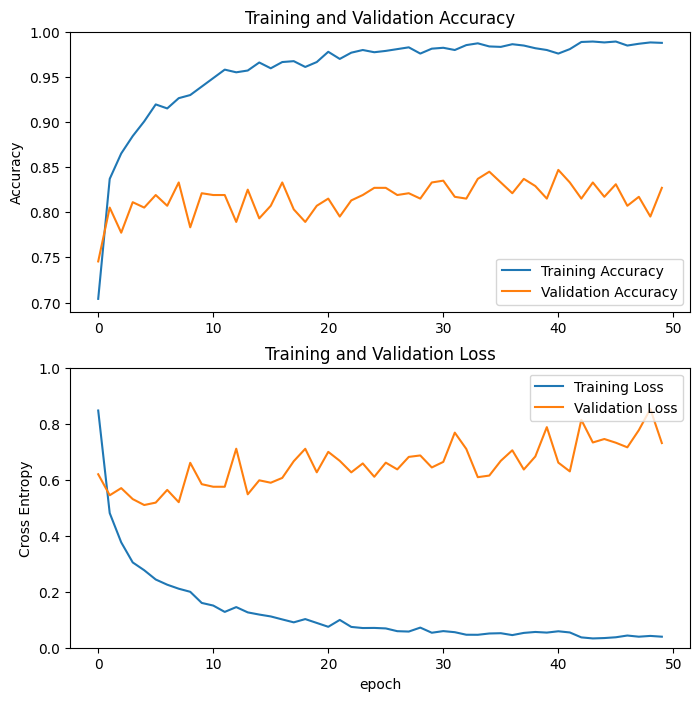

In [16]:
import matplotlib.pyplot as plt

acc = Model.history['accuracy']
val_acc = Model.history['val_accuracy']

loss = Model.history['loss']
val_loss = Model.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

1/1 [==============================] - 0s 211ms/step
[[0.16872175 0.00541254 0.09491375 0.06196753 0.61434746 0.05463696]]
This image -> plastic


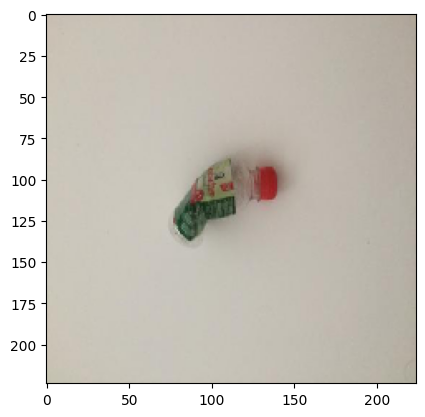

In [27]:
from tensorflow.keras.utils import load_img,img_to_array
import numpy as np
import matplotlib.pyplot as plt
path = './data/plastic/plastic9.jpg'
img = load_img(path,target_size = (224,224))
x = img_to_array(img)
x /= 255
x = np.expand_dims(x,axis = 0)
image = [x]
plt.imshow(img)
pred = model5.predict(image)
print(pred)
result=np.argmax(pred[0])
if result == 0: print("\033[94m"+"This image -> Cardboard"+"\033[0m")
elif result ==1: print("\033[94m"+"This image -> glass"+"\033[0m")
elif result == 2: print("\033[94m"+"This image -> metal"+"\033[0m")
elif result ==3: print("\033[94m"+"This image -> paper"+"\033[0m")
elif result ==4: print("\033[94m"+"This image -> plastic"+"\033[0m")
elif result ==5: print("\033[94m"+"This image -> trash"+"\033[0m")